### Install the required dependencies

In [12]:
# pip install opencv-python
# pip install imutils
# pip install sklearn

### Import all the needed libraries

In [13]:
import pandas as pd
import numpy as np
import imutils
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import cv2
import os
from imutils import paths
from skimage.io import imshow
from random import seed
from random import randrange
from math import sqrt

## Image Preprocessing

### All the images will be resized to 32*32

In [14]:
size = (32, 32)

### Converts the image into a 1D array, basically the raw pixels are extracted

In [15]:
def image_to_raw(image,size):
    return cv2.resize(image,size).flatten()

### Image Mean and Standard Deviation extraction function is defined (needs expansion)

In [16]:
def image_to_stds_mean(image):
    #First resizes the image then extracts the features
    return cv2.meanStdDev(image)

### Function to Read files and return the image path along with the label data

In [17]:
def ReadFiles(Path):
    ImageList = list()
    LabelList = list()

    # Get all subdirectories
    FolderList = os.listdir(Path)

    # Loop over each directory
    for File in FolderList:
        if(os.path.isdir(Path + os.path.sep + File)):
            for Image in os.listdir(Path + os.path.sep + File):
                # Add the image path to the list
                ImageList.append(Path + os.path.sep + File + os.path.sep + Image)

                # Add a label for each image and remove the file extension
                LabelList.append(File.split(".")[0])
        else:
            ImageList.append(Path + os.path.sep + File)

            # Add a label for each image and remove the file extension
            LabelList.append(File.split(".")[0])

    return ImageList, LabelList

### Initialize the path of the Training Images

In [18]:
Path_Train = "..\Dataset\Training_Data"
ImageList,LabelList  = ReadFiles(Path_Train)

In [19]:
ImageList[0]

'..\\Dataset\\Training_Data\\Cats\\cat.1.jpg'

In [20]:
ImageList[-1]

'..\\Dataset\\Training_Data\\Dogs\\dog.91.jpg'

In [21]:
len(ImageList)

171

In [22]:
LabelList[0]

'Cats'

### Example of a Cat picture

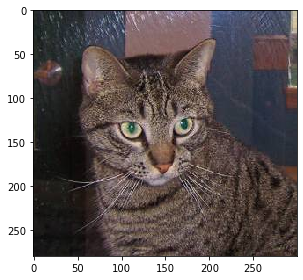

In [23]:
imshow(ImageList[0])

### Example of a Dog picture

In [24]:
ImageList[-1]

'..\\Dataset\\Training_Data\\Dogs\\dog.91.jpg'

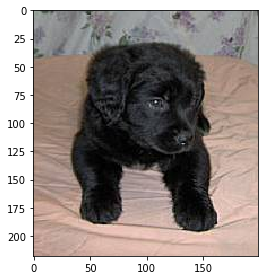

In [25]:
imshow(ImageList[-1])

In [26]:
mean_train = []
std_train = []
label_train = []   

In [27]:
for (i,imagepath) in enumerate(ImageList):
    image = cv2.imread(imagepath)
    # Convert the images to uniform size
    image = cv2.resize(image,size)

    # Feature Extraction 
    means,stds = image_to_stds_mean(image)

    #Converts the means and standard deviation entries to 1*3
    # print("Before Flattening")
    # print(means.shape)
    means = means.flatten()
    stds = stds.flatten()
    # print("After Flattening")
    # print(means.shape)

    #The subsequent entries are appended to the final array of features
    mean_train.append(means)
    std_train.append(stds)
    
    #Since, we have already extracted labels, we append to the final array according to the index
    label_train.append(LabelList[i])

In [28]:
len(mean_train)

171

In [29]:
mean_train[0]

array([68.91503906, 69.16308594, 79.69335938])

In [30]:
std_train[0]

array([33.57296753, 33.28258161, 39.99948382])

In [31]:
label_train[:10]

['Cats',
 'Cats',
 'Cats',
 'Cats',
 'Cats',
 'Cats',
 'Cats',
 'Cats',
 'Cats',
 'Cats']

## Label Encoder converts the label array from cats and dogs to 0 and 1

#### This makes it possible for us to train our machine learning models

In [32]:
from sklearn.preprocessing import LabelEncoder 
labelencode =  LabelEncoder() 
label_train= labelencode.fit_transform(label_train) 

In [33]:
label_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Convertion to numpy arrays for better computation

In [34]:
mean_train= np.array(mean_train)
std_train = np.array(std_train)
label_train = np.array(label_train)

In [35]:
print("The shape of the mean features array is")
print(mean_train.shape)
print("The size of the mean features is ")
print(mean_train.size)
print("The shape of the standard deviation features array is")
print(mean_train.shape)
print("The size of the standard deviation features is ")
print(std_train.size)
print("The shape of the label features array is")
print(label_train.shape)
print("The size of the label (result) is ")
print(label_train.size)



The shape of the mean features array is
(171, 3)
The size of the mean features is 
513
The shape of the standard deviation features array is
(171, 3)
The size of the standard deviation features is 
513
The shape of the label features array is
(171,)
The size of the label (result) is 
171


### Combining the mean and the std features to form one feature vector

In [36]:
Train = np.concatenate((mean_train,std_train),axis = 1)
Train[0]


array([68.91503906, 69.16308594, 79.69335938, 33.57296753, 33.28258161,
       39.99948382])

In [37]:
Train.shape

(171, 6)

### Now, for application of KNN. I am appending the labels to the training dataset

In [38]:
Train = np.concatenate((Train,label_train[:,None]),axis  = 1)
Train[0]

array([68.91503906, 69.16308594, 79.69335938, 33.57296753, 33.28258161,
       39.99948382,  0.        ])

In [39]:
Train.shape

(171, 7)

## Now, We are using 171 images as the Training Data and the 38 images as the Test Data 


### Similarly, we repeat the steps for extracting features from the test images

In [40]:
Path_Test = "..\Dataset\Test_Data"
ImageList,LabelList  = ReadFiles(Path_Test)
len(ImageList)

38

In [41]:
mean_test = []
std_test = []
label_test = []

In [42]:
for (i,imagepath) in enumerate(ImageList):
    image = cv2.imread(imagepath)
    # Convert the images to uniform size
    image = cv2.resize(image,size)

    # Feature Extraction 
    means,stds = image_to_stds_mean(image)

    #Converts the means and standard deviation entries to 1*3
    # print("Before Flattening")
    # print(means.shape)
    means = means.flatten()
    stds = stds.flatten()
    # print("After Flattening")
    # print(means.shape)

    #The subsequent entries are appended to the final array of features
    mean_test.append(means)
    std_test.append(stds)
    
    #Since, we have already extracted labels, we append to the final array according to the index
    label_test.append(LabelList[i])

In [43]:
mean_test= np.array(mean_test)
std_test = np.array(std_test)
label_test = np.array(label_test)

In [44]:
Test = np.concatenate((mean_test,std_test),axis = 1)
Test[0]


array([154.87792969, 145.94140625, 129.06933594,  64.24679088,
        62.8642859 ,  54.2721196 ])

## Cross Validation 

### Cross validation basically forms various sets of train and test data and then caculates the accracy. This helps us in finding out the value of k which gives us the maximum accuracy

In [45]:
# Split a dataset into n folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split


In [46]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(x1, x2):
	distance = 0.0
	for i in range(len(x1)-1):
		distance += (x1[i] - x2[i])**2 
	return sqrt(distance)


In [63]:
# Calculate accuracy percentage
def accuracy_cal(label, predicted):
	correct = 0
    # index = 0
	for i in range(len(label)):
		if label[i] == predicted[i]:
			correct += 1
        # index +=1
    
	return correct / float(len(label)) 


In [64]:
# Locate the most similar neighbors
def neighbors_col(train, test_row, neighbors_num):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(neighbors_num):
		neighbors.append(distances[i][0])
	return neighbors



In [65]:
# Make a prediction with neighbors
def predict(train, test, neighbors_num):
	neighbors = neighbors_col(train, test, neighbors_num)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction


# k - Nearest Neighbours Algorithm

In [66]:

def k_nearest_neighbors(train, test, k):
	predictions = list()
	for row in test:
		output = predict(train, row, k)
		predictions.append(output)
	return(predictions)



In [67]:
def model(dataset,n_folds,k):
    folds = cross_validation_split(dataset,n_folds)
    scores = list()
    folds = list(folds)
    for fold in folds:
        # Converts to numpy array
        train_set = np.array(folds)

        # Finds the index of the current fold
        index = np.where((train_set == fold).all(axis=1))

        # Deletes the fold from the training set
        train_set = np.delete(train_set,index[0],axis=0)

        # Converts to list
        train_set = train_set.tolist()
        train_set = sum(train_set, [])

        #Forms the test set
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None

        # print(len(train_set))
        predicted = k_nearest_neighbors(train_set,test_set,k)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_cal(actual, predicted)
        scores.append(accuracy)
    return scores

## Lets find the K with the maximum accuracy using the above functions

In [68]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

## Plotting only the first 2 features on a graph

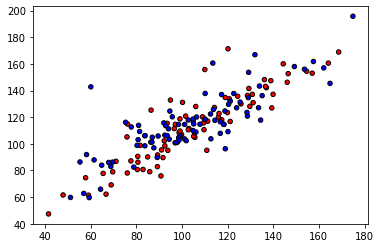

In [69]:
plt.figure()
plt.scatter(Train[:,0],Train[:,1],c=label_train,cmap = cmap,edgecolors='k',s= 20)

In [70]:
Accuracy = []
for i in range(1,21):
    n_folds = 5
    k = i
    scores = model(Train,n_folds,k)
    accuracy = sum(scores)/float(len(scores))
    print('|| K Value: %s  || Accuracy: %.2f ||' % (k,accuracy))
    Accuracy.append(accuracy)
# print(len(Accuracy))


|| K Value: 1  || Accuracy: 0.53 ||
|| K Value: 2  || Accuracy: 0.51 ||
|| K Value: 3  || Accuracy: 0.51 ||
|| K Value: 4  || Accuracy: 0.55 ||
|| K Value: 5  || Accuracy: 0.62 ||
|| K Value: 6  || Accuracy: 0.52 ||
|| K Value: 7  || Accuracy: 0.51 ||
|| K Value: 8  || Accuracy: 0.53 ||
|| K Value: 9  || Accuracy: 0.58 ||
|| K Value: 10  || Accuracy: 0.54 ||
|| K Value: 11  || Accuracy: 0.55 ||
|| K Value: 12  || Accuracy: 0.49 ||
|| K Value: 13  || Accuracy: 0.58 ||
|| K Value: 14  || Accuracy: 0.54 ||
|| K Value: 15  || Accuracy: 0.57 ||
|| K Value: 16  || Accuracy: 0.53 ||
|| K Value: 17  || Accuracy: 0.51 ||
|| K Value: 18  || Accuracy: 0.51 ||
|| K Value: 19  || Accuracy: 0.52 ||
|| K Value: 20  || Accuracy: 0.56 ||


Text(0, 0.5, 'Accuracy')

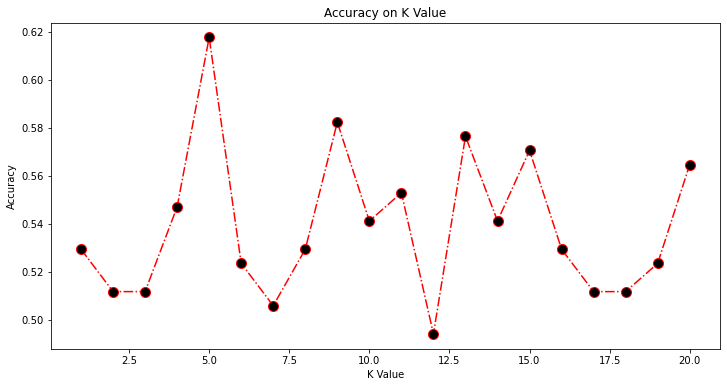

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), Accuracy, color='red', linestyle='-.', marker='o',markerfacecolor='black', markersize=10)
plt.title('Accuracy on K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

### Find the maximum accuracy and hence addition of 1 gives us the k_max

In [72]:
Accuracy = np.array(Accuracy)
index = Accuracy.argmax()
index
k_max = index + 1
print(k_max)

5


### Just for the sake of it, lets change the values of n_folds and then find out the maximum accuracy

In [79]:
Accuracy_n_fold = []
for i in range(4,15):
    n_folds = i
    k = k_max
    scores = model(Train,n_folds,k)
    accuracy = sum(scores)/float(len(scores))
    print('Mean Accuracy: %.3f ' % (sum(scores)/float(len(scores))))
    Accuracy_n_fold.append(accuracy)
print(len(Accuracy_n_fold))

Mean Accuracy: 0.482 
Mean Accuracy: 0.482 
Mean Accuracy: 0.494 
Mean Accuracy: 0.506 
Mean Accuracy: 0.476 
Mean Accuracy: 0.509 
Mean Accuracy: 0.535 
Mean Accuracy: 0.503 
Mean Accuracy: 0.536 
Mean Accuracy: 0.491 
Mean Accuracy: 0.548 
11


Text(0, 0.5, 'Accuracy')

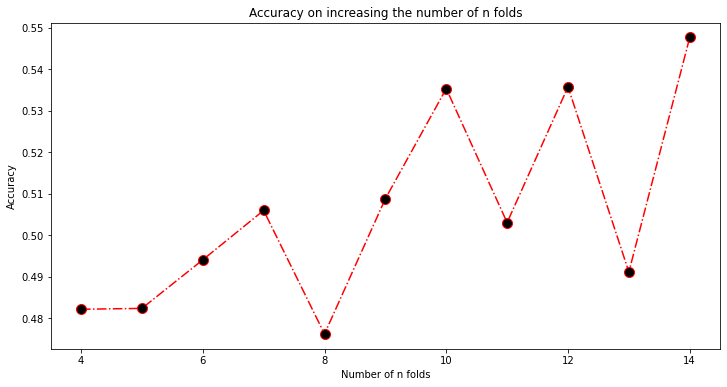

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(range(4, 15), Accuracy_n_fold, color='red', linestyle='-.', marker='o',markerfacecolor='black', markersize=10)
plt.title('Accuracy on increasing the number of n folds')
plt.xlabel('Number of n folds')
plt.ylabel('Accuracy')

## Now, Lets Classify the Test images using k_max

In [81]:
k = k_max
Prediction_combi = k_nearest_neighbors(Train,Test,k)
Prediction_combi

[0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

# The value of k max is

In [83]:
k_max

5

## Convert Labels to Cats and Dogs

In [84]:
Prediction_combi
Final = [] 
for i in Prediction_combi:
    if i == 0.0:
        Final.append('Cat')
    else:
        Final.append('Dog')

In [85]:
label_test.shape

(38,)

In [86]:
Final = np.array(Final)
Final


array(['Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog',
       'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Cat', 'Cat', 'Dog', 'Cat',
       'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Cat', 'Cat',
       'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat',
       'Cat', 'Dog'], dtype='<U3')

## Concatenate results with the test features 

In [87]:
Final_ans = np.concatenate((Test,Final[:,None]),axis = 1)
Final_ans.shape

(38, 7)

In [88]:
column_values = ['R mean', 'B mean', 'G mean','R std dev', 'B std dev', 'G std dev','Predicted Class'] 
  
# creating the dataframe 
df = pd.DataFrame(data = Final_ans, columns = column_values) 
print(df)

            R mean          B mean          G mean           R std dev  \
0   154.8779296875    145.94140625  129.0693359375   64.24679087628662   
1    41.1396484375     66.29296875   103.857421875   32.46420851108808   
2    88.3291015625  107.0439453125   128.970703125   49.22487157143287   
3     80.830078125  104.0439453125  126.3173828125   42.45648546225178   
4    178.380859375  191.8720703125  198.8154296875   50.25292926050654   
5    136.728515625   140.833984375  149.3017578125   67.84612161434971   
6    104.908203125  136.9208984375  134.4892578125   65.06918922065758   
7    72.3876953125   85.7587890625    94.771484375  57.387620182031995   
8       124.234375   132.791015625    141.13671875   83.02634976836796   
9   106.9306640625   92.2080078125    129.72265625    74.6404799503277   
10  190.6455078125  191.8310546875     199.8515625   47.26012952903855   
11  135.3408203125   137.451171875  150.0263671875   45.88183333931947   
12      93.5546875  108.2587890625  11

Cat


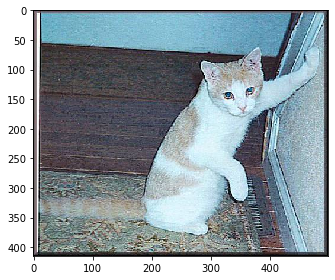

In [89]:
print(Final[0])
imshow(ImageList[0])


Dog


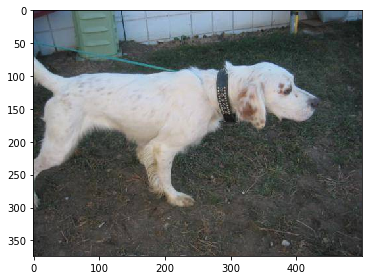

In [91]:
print(Final[37])
imshow(ImageList[37])

#                                                                       THANK YOU